# Introduction

In this project, we perform Principal Component Analysis (PCA) on the California Housing Dataset from the 1990 US Census. The goal is to reduce the dimensionality of the dataset while retaining as much information as possible, and to identify key features influencing housing prices. By applying PCA, we aim to:

- Visualize patterns and relationships between features in a lower-dimensional space.

- Identify the most influential factors affecting median house values.

- Explore how variables like location, income, and population contribute to housing price variations.

Dimensionality reduction techniques like PCA are useful in datasets with multiple correlated variables. PCA transforms the original dataset into a new set of uncorrelated variables called principal components, which capture the maximum variance in the data. This allows us to understand complex relationships, improve model performance, and reduce computational costs.

# Dataset Description
Data source : https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features/data

The dataset contains information on California housing from the 1990 US Census. It describes demographic and geographic features of various districts in California. Each row represents a block group—the smallest geographic unit for which the census publishes sample data. The dataset includes 14 features:

- **Median House Value:** Median value of houses within a block (in US Dollars).

- **Median Income:** Median income for households in a block (in tens of thousands of US Dollars).

- **Median Age:** Median age of houses within a block (years).

- **Total Rooms:** Total number of rooms within a block.

- **Total Bedrooms:** Total number of bedrooms within a block.

- **Population:** Total population residing in a block.

- **Households:** Total number of households (a household refers to people sharing a home unit).

- **Latitude:** Geographic latitude of the block group (higher values indicate further north).

- **Longitude:** Geographic longitude of the block group (higher values indicate further west).

- **Distance to Coast**: Distance from the block to the nearest coastal point (in meters).

- **Distance to Los Angeles:** Distance from the block to the center of Los Angeles (in meters).

- **Distance to San Diego:** Distance from the block to the center of San Diego (in meters).

- **Distance to San Jose:** Distance from the block to the center of San Jose (in meters).

- **Distance to San Francisco:** Distance from the block to the center of San Francisco (in meters).

The target variable in our analysis is Median House Value, which we aim to understand and analyze through the lens of the other variables.

# Part 1: Setting up the Environment and Loading Data

## Step 1: importing the librairies 

In [1]:
# Data manipulation libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Machine learning libraries
from sklearn.preprocessing import StandardScaler
import prince

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

## Step 2: load the dataset and its statistics

In [2]:
# Load the dataset
data = pd.read_csv('California_Houses.csv')

# Display the first few rows of the dataset
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [3]:
# shape of the dataset 
n = np.shape(data)[0]
p = np.shape(data)[1]
print("Shape of Dataset: {}\n\t* Number of samples:\t{}\n\t* Number of features:\t{}"
      .format(np.shape(data), n, p))

Shape of Dataset: (20640, 14)
	* Number of samples:	20640
	* Number of features:	14


In [4]:
# type of columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

- The dataset consists of 14 columns with numerical data types (9 float64 and 5 int64), which are suitable for PCA as it requires numerical input to compute the principal components

## Step 3: Exploratory data analysis 

#### **checking dupplicate values**

In [5]:
# Find duplicate rows
duplicate_rows_data = data[data.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows: ", duplicate_rows_data.shape[0])

Number of duplicate rows:  0


- there is no dupplicated rows 

#### **Checking for missing values**

In [6]:
print(data.isnull().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


- there is no missing values in our dataset 

#### **checking distinct values**

In [7]:
# Loop through each column and count the number of distinct values
print("number of distinct values in each column:")
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values}")

number of distinct values in each column:
Median_House_Value: 3842
Median_Income: 12928
Median_Age: 52
Tot_Rooms: 5926
Tot_Bedrooms: 1928
Population: 3888
Households: 1815
Latitude: 862
Longitude: 844
Distance_to_coast: 12590
Distance_to_LA: 12590
Distance_to_SanDiego: 12590
Distance_to_SanJose: 12590
Distance_to_SanFrancisco: 12590


In [8]:
#descriptive statistics about the data 
data.describe().style.format("{:.2f}")

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,206855.82,3.87,28.64,2635.76,537.90,1425.48,499.54,35.63,-119.57,40509.26,269421.98,398164.93,349187.55,386688.42
std,115395.62,1.90,12.59,2181.62,421.25,1132.46,382.33,2.14,2.00,49140.04,247732.45,289400.56,217149.88,250122.19
min,14999.00,0.50,1.00,2.00,1.00,3.00,1.00,32.54,-124.35,120.68,420.59,484.92,569.45,456.14
25%,119600.00,2.56,18.00,1447.75,295.00,787.00,280.00,33.93,-121.80,9079.76,32111.25,159426.39,113119.93,117395.48
50%,179700.00,3.53,29.00,2127.00,435.00,1166.00,409.00,34.26,-118.49,20522.02,173667.46,214739.83,459758.88,526546.66
75%,264725.00,4.74,37.00,3148.00,647.00,1725.00,605.00,37.71,-118.01,49830.41,527156.24,705795.40,516946.49,584552.01
max,500001.00,15.00,52.00,39320.00,6445.00,35682.00,6082.00,41.95,-114.31,333804.69,1018260.12,1196919.27,836762.68,903627.66


**General interpretations:**
- *Range of Values:* The features have vastly different ranges. For example, Tot_Rooms ranges from 2 to 39,320, while Median_Income ranges from 0.50 to 15.00. This disparity in ranges can affect the performance of PCA, as features with larger ranges will dominate the principal components.

- *Outliers:* There are significant outliers in the dataset. For instance, Tot_Rooms has a maximum value of 39,320, which is much higher than the 75th percentile value of 3,148. Similarly, Tot_Bedrooms has a maximum value of 6,445, which is much higher than the 75th percentile value of 647. These outliers can skew the results of PCA.

- *Standard Deviation:* The standard deviations of the features vary widely. For example, Median_House_Value has a standard deviation of 115,396, while Median_Income has a standard deviation of 1.90. Features with higher standard deviations will have a larger influence on the principal components.

- *Mean and Median:* The mean and median values of some features are quite different, indicating skewness in the data. For example, the mean Tot_Rooms is 2,635.76, while the median is 2,127. This skewness can affect the PCA results.

    Given these observations, it is important to standardize the features before applying PCA. Standardization will scale the features to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the principal components.

### CORRELATION MATRIX

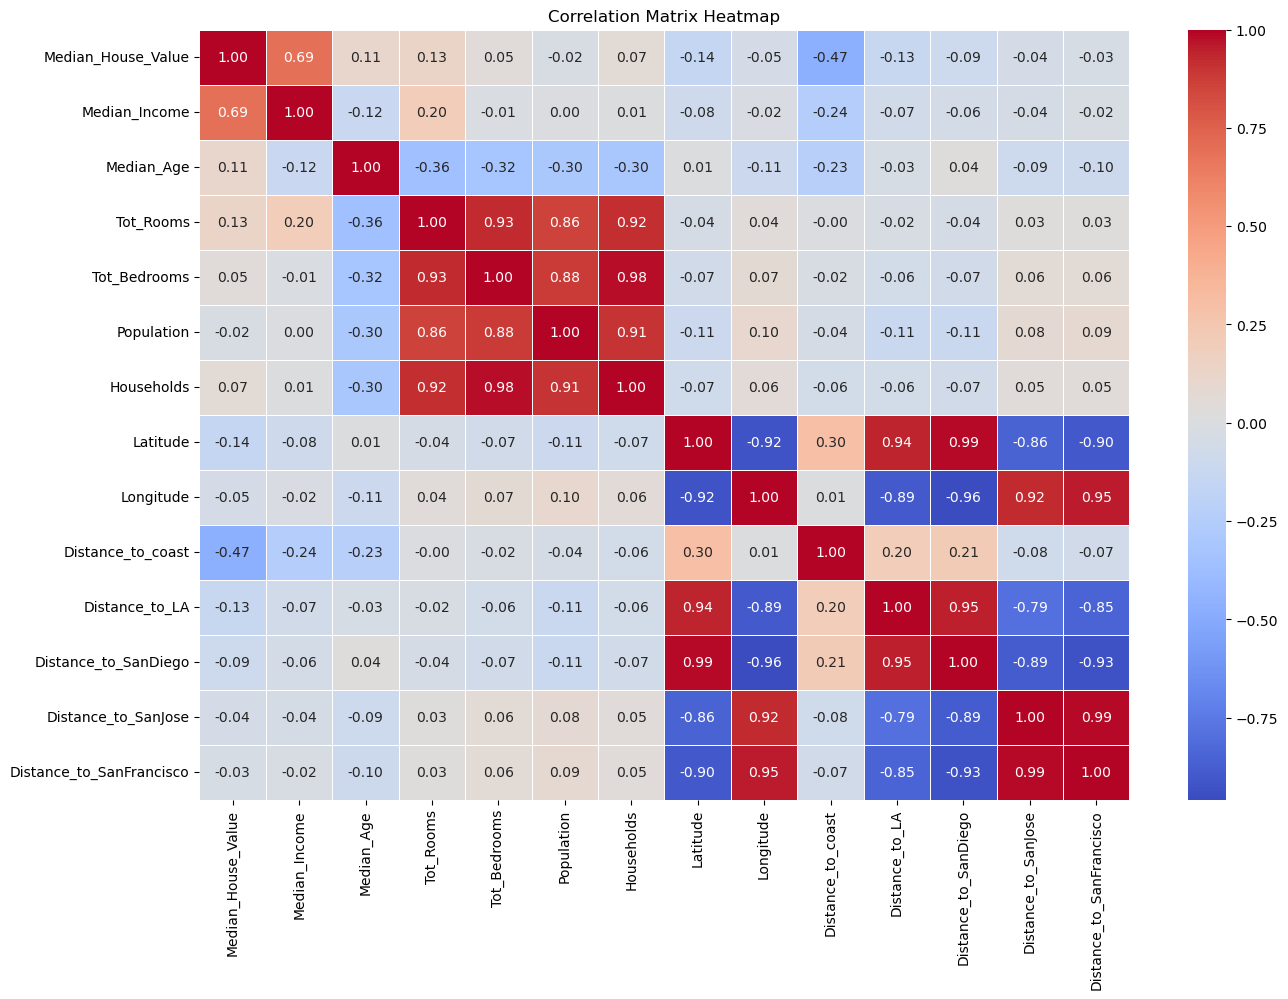

In [9]:
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

**interpretations:**

*Strong Positive Correlations:*

- Tot_Rooms and Tot_Bedrooms (0.93): This indicates that houses with more rooms tend to have more bedrooms.
- Tot_Rooms and Households (0.92): This suggests that houses with more rooms are associated with more households.
- Tot_Bedrooms and Households (0.98): This shows a very strong correlation, indicating that more bedrooms are strongly associated with more households.
- Latitude and Distance_to_LA (0.94), Distance_to_SanDiego (0.99): This indicates that the latitude of the houses is strongly correlated with their distances to Los Angeles and San Diego.
  
*Strong Negative Correlations:*

- Latitude and Longitude (-0.92): This suggests that as the latitude increases, the longitude decreases.
- Latitude and Distance_to_SanJose (-0.86), Distance_to_SanFrancisco (-0.90): This indicates that houses located further north (higher latitude) are closer to San Jose and San Francisco.
- Distance_to_coast and Median_House_Value (-0.47): This suggests that houses closer to the coast tend to have higher values.
  
*Moderate Positive Correlations:*

- Median_Income and Median_House_Value (0.69): This indicates that higher median incomes are associated with higher house values.
- Population and Tot_Rooms (0.86), Tot_Bedrooms (0.88): This suggests that areas with higher populations tend to have houses with more rooms and bedrooms.
  
*Moderate Negative Correlations:*

- Distance_to_coast and Median_Income (-0.24): This indicates that houses closer to the coast tend to have higher median incomes.
- Distance_to_LA and Median_House_Value (-0.13): This suggests that houses closer to Los Angeles tend to have higher values.
  
*Weak Correlations:*

- Median_Age has weak correlations with most other variables, indicating that the age of the houses does not strongly relate to other features in the dataset.

### Data Preparation & Feature Engineering

In [10]:
# Create a copy of the dataset to avoid modifying the original
df = data.copy()

# 1. Combine Distance Features
# These features are highly correlated, so we average them to capture spatial information in one column.
df['avg_distance'] = df[['Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
                         'Distance_to_SanJose', 'Distance_to_SanFrancisco']].mean(axis=1)

# 2. Drop Redundant Columns
# Remove individual distance and geolocation columns as they are now represented by 'avg_distance'.
df.drop(['Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
         'Distance_to_SanJose', 'Distance_to_SanFrancisco', 'Latitude', 'Longitude'], axis=1, inplace=True)

# 3. Verify Changes
print(df.columns)  # Check remaining features
print(df.shape)    # Confirm dataset dimensions


Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'avg_distance'],
      dtype='object')
(20640, 8)


**The goal of this step**
- *Improves PCA Performance:* Removing excess features reduces noise and allows PCA to focus on meaningful variability.
- *Enhances Interpretability:* Using one aggregate measure makes visualizing spatial effects easier

In [11]:
df.head()   # View the updated dataset

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,avg_distance
0,452600.0,8.3252,41,880,129,322,126,277995.347373
1,358500.0,8.3014,21,7099,1106,2401,1138,276734.595295
2,352100.0,7.2574,52,1467,190,496,177,276014.852480
3,341300.0,5.6431,52,1274,235,558,219,276075.165876
4,342200.0,3.8462,52,1627,280,565,259,276075.165876


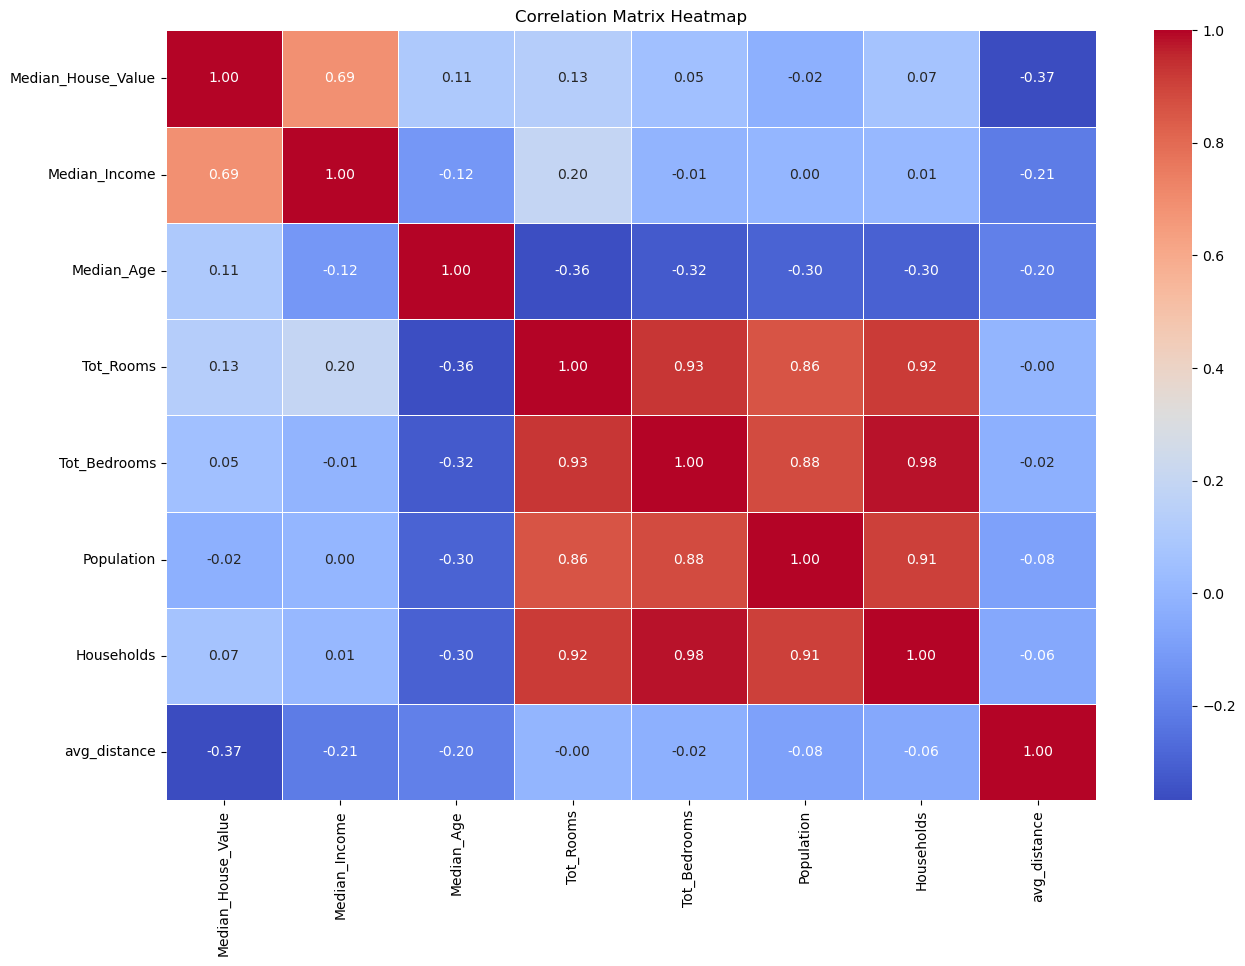

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

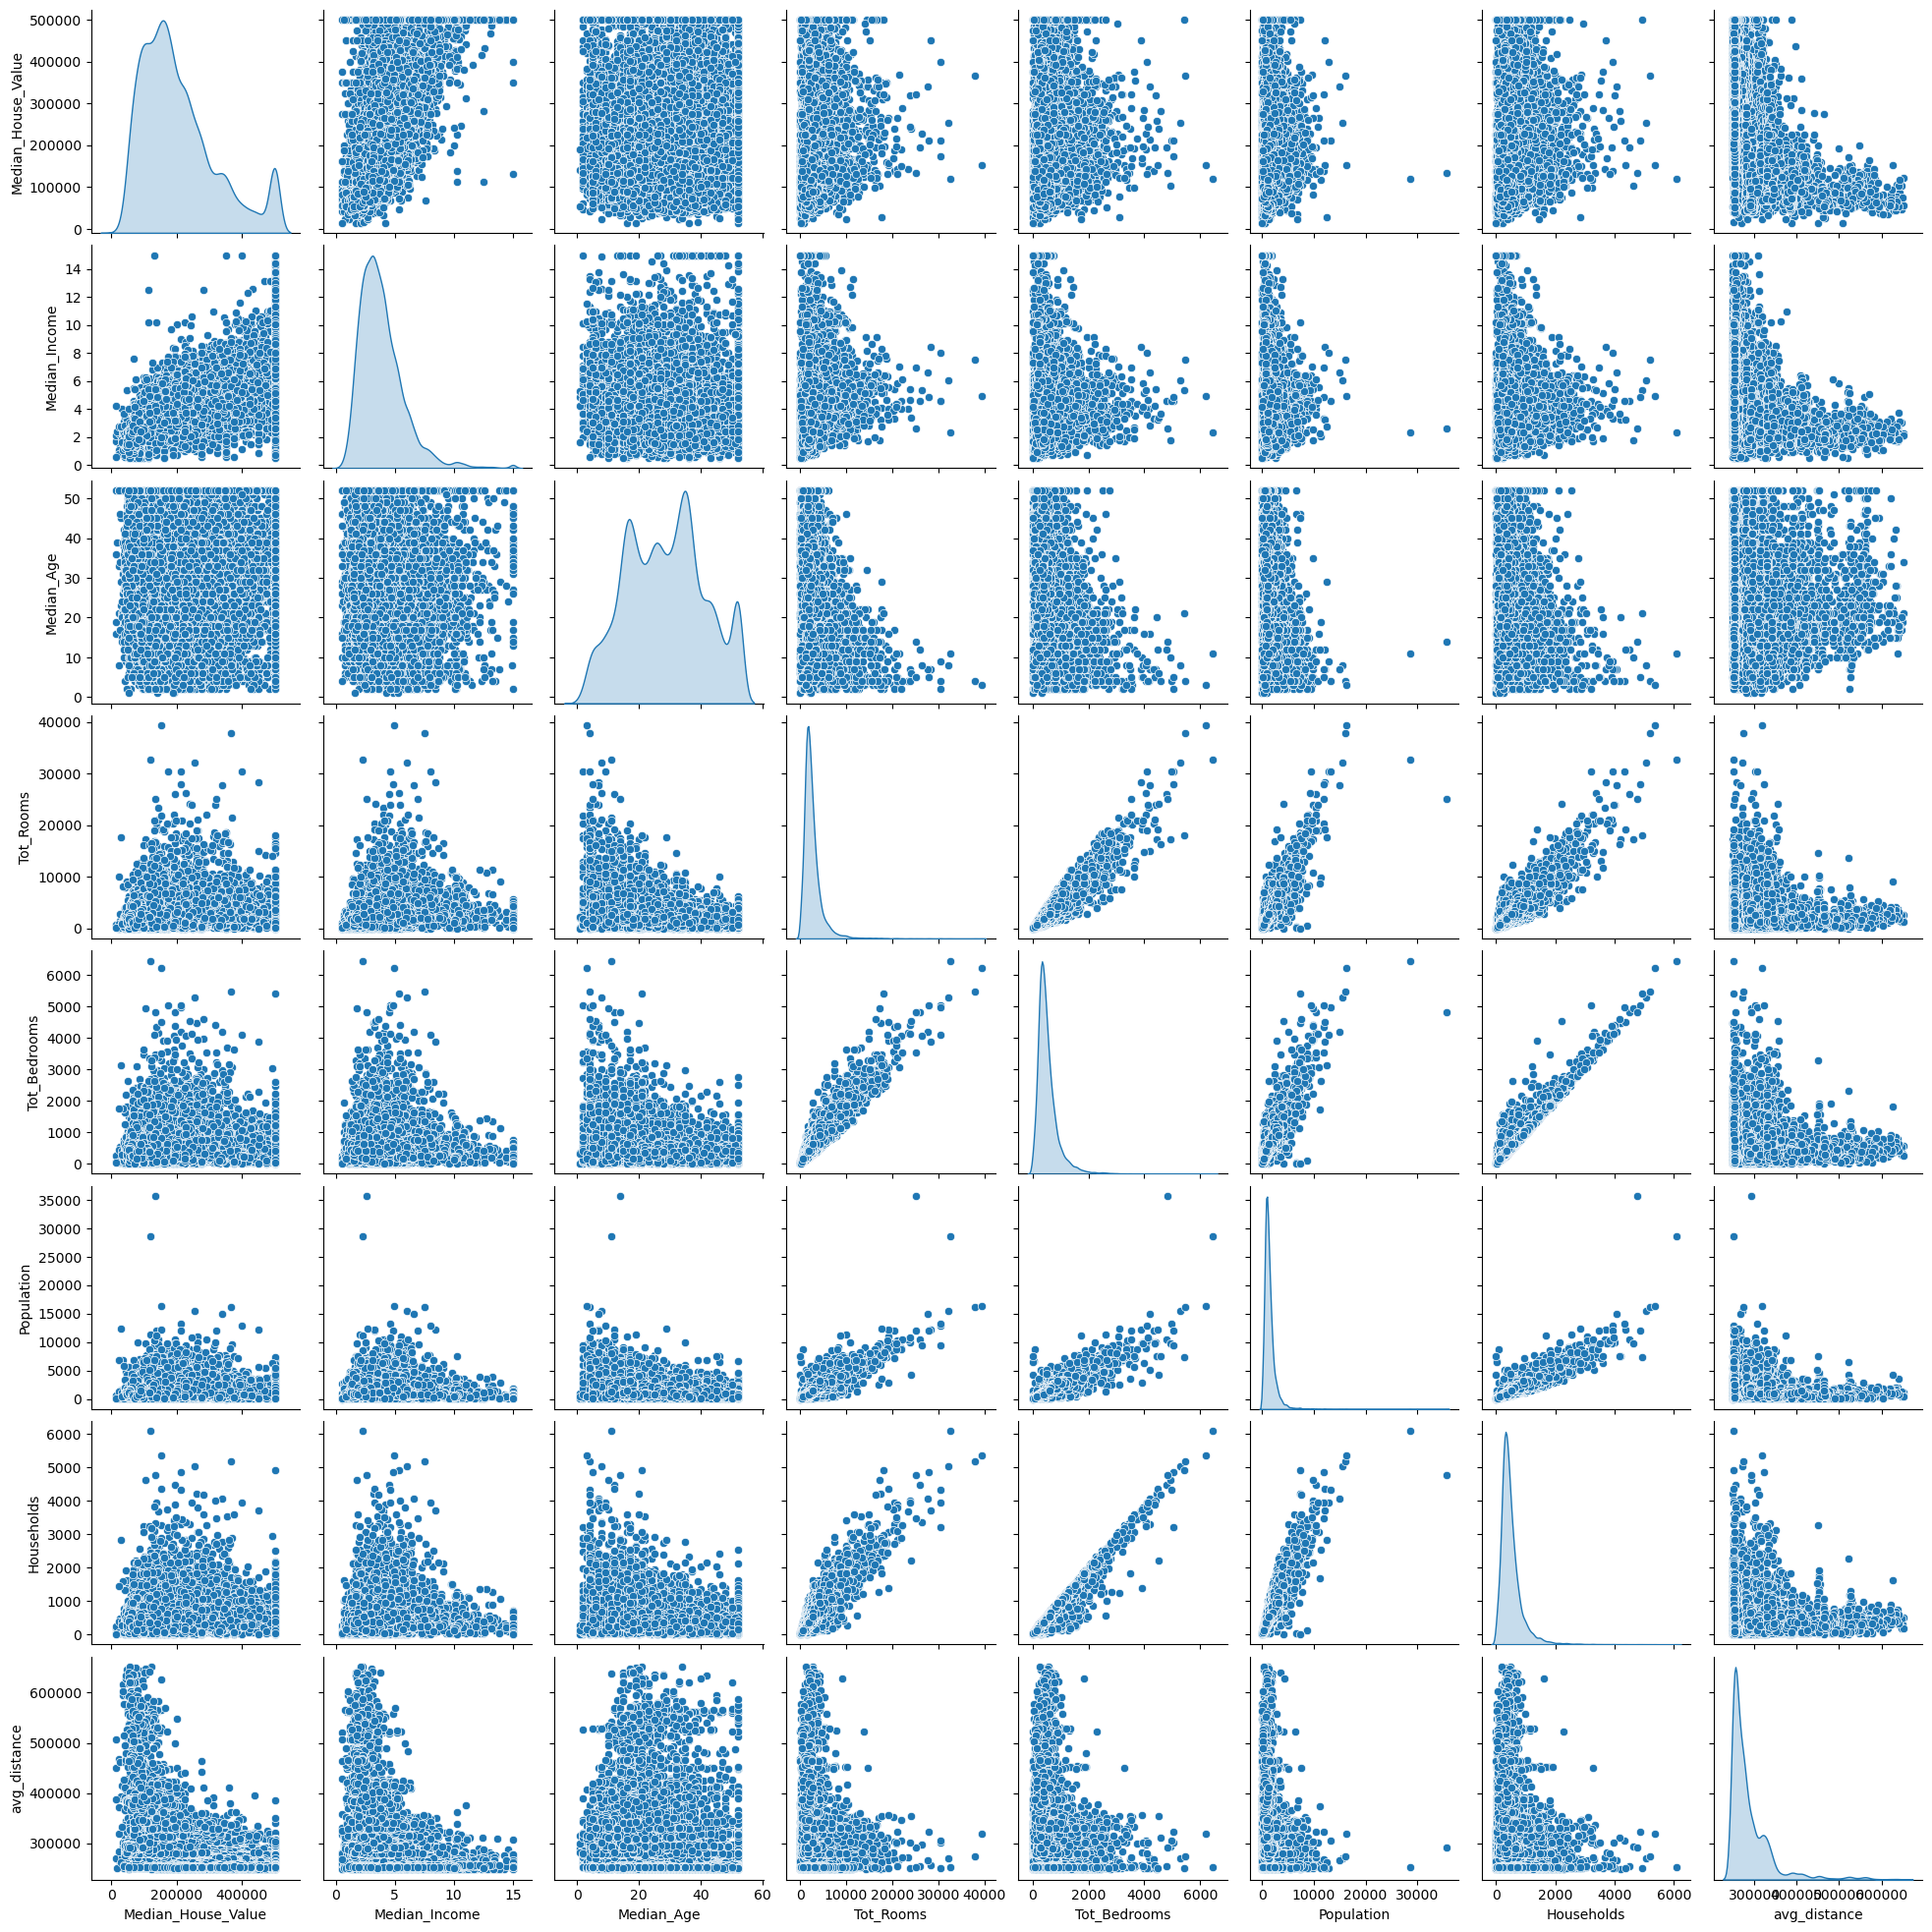

In [13]:
# Pair plot analysis
sns.pairplot(df,diag_kind="kde")
plt.show()

***general interpretation:***

**Individual Variable Distributions (Diagonal Elements)**

The diagonal elements show the Kernel Density Estimate (KDE) of each variable. The distributions suggest that:

- Median_House_Value: The distribution is left-skewed, indicating that most house values are on the lower end with some expensive outliers.
- Median_Age: This variable has a more concentrated distribution with fewer extreme values, suggesting a more uniform age distribution of houses.
- Other Variables: Most of the variables exhibit heavy left tails, indicating the presence of very low values.

**Relationships Between Variables (Off-Diagonal Elements)**

*Strong Positive Correlations (Linear Relationships):*

- Total Rooms vs. Total Bedrooms: Houses with more rooms also have more bedrooms.
- Population vs. Households: More populated areas tend to have more households.
- Total Rooms vs. Households: More rooms are associated with more households, indicating multi-unit dwellings.
  
*Non-Linear or Weaker Correlations:*

- Median_House_Value vs. Median_Income: There is a positive correlation, meaning wealthier areas tend to have higher house prices, but the relationship is not perfectly linear.
- Median_House_Value vs. Population: The pattern is more scattered, showing house prices do not strongly depend on population size.
- Avg_Distance vs. Median_House_Value: The relationship is slightly negative—houses farther from city centers may have lower prices.
  
*Multicollinearity Observations:*

The presence of high correlations among some variables (e.g., Total Rooms, Total Bedrooms, Population, Households) suggests redundancy in information, making them ideal candidates for dimensionality reduction using PCA.


#### **Link to PCA**
Since PCA works by transforming correlated variables into a set of uncorrelated principal components, we can expect:

- The first principal component (PC1) will likely capture the variation among Total Rooms, Total Bedrooms, Population, and Households, as these are highly correlated.
- The second principal component (PC2) may focus on variables like Median Income which show moderate correlation but might have different variance contributions.
- Avg_Distance might contribute to later components as it has weaker correlations with other features.
PCA will help reduce redundancy and extract meaningful patterns, allowing us to work with fewer dimensions while retaining most of the dataset's variance.

In [14]:
# exclude the target 
X = df.drop('Median_House_Value', axis=1)  # Exclude target

In [15]:
X.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,avg_distance
0,8.3252,41,880,129,322,126,277995.347373
1,8.3014,21,7099,1106,2401,1138,276734.595295
2,7.2574,52,1467,190,496,177,276014.852480
3,5.6431,52,1274,235,558,219,276075.165876
4,3.8462,52,1627,280,565,259,276075.165876


# Part 2: Performing PCA

In this part, we will perform Principal Component Analysis (PCA) to reduce the dimensionality of our dataset while retaining most of the variance.

## Step 1: Initialize the PCA Model 

We initialize the PCA model with 2 components to capture the majority of the variance in the data, we standardized the data by making rescale_with_mean and rescale_with_std equal to True 

In [ ]:
pca = prince.PCA(
    n_components=2,
    n_iter=3, #Sets the number of iterations for the Singular Value Decomposition (SVD) solver.
    copy=True,
    check_input=True, #Ensures that the input data is validated before processing. This helps catch errors in the input format.
    rescale_with_mean=True,
    rescale_with_std=True,
    engine='sklearn',
    random_state=42
)

- By setting n_components=2, we aim to reduce the dataset to two principal components, which will simplify the data while preserving as much variance as possible.

## Step 2: Fit the PCA Model

In [17]:
pca = pca.fit(X)

- Fitting the PCA model computes the principal components and the amount of variance explained by each component. This step prepares the model to transform the data into the new principal component space.

## Step 3: Get the Principal Components and Coordinates

We transform the dataset into the principal component space and reattach the Median_House_Value column.

In [18]:
# Transform the data to get the principal components
principal_components = pca.transform(X)

In [19]:
# Reattach the Price_Category column to principal_components
principal_components['Median_House_Value'] = df['Median_House_Value']

In [20]:
print("Principal components:\n", principal_components.head(10))

Principal components:
 component         0         1  Median_House_Value
0         -1.920297 -1.766998            452600.0
1          3.138794 -1.461453            358500.0
2         -1.793538 -1.715464            352100.0
3         -1.742162 -1.208565            341300.0
4         -1.598671 -0.657721            342200.0
5         -1.979870 -0.702040            269700.0
6         -0.603746 -0.628508            299200.0
7         -0.058924 -0.463121            241400.0
8         -0.106473  0.087616            226700.0
9          0.329076 -0.655712            261100.0


- The transformed dataset now consists of the principal components, which are linear combinations of the original features. These components capture the most significant patterns in the data, making it easier to analyze and visualize.

In [21]:
pca.column_coordinates_

component,0,1
variable,,
Median_Income,0.089281,-0.654868
Median_Age,-0.428108,-0.303989
Tot_Rooms,0.961122,-0.056102
Tot_Bedrooms,0.972693,0.033679
Population,0.933320,-0.019404
Households,0.975729,-0.005245
avg_distance,-0.032300,0.844688


- the output shows the coordinates of each variable in the new principal component space. Each row represents a variable, and each column represents a principal component.
- it indicates how much each original variable contributes to each principal component. For example, Tot_Rooms has a high positive contribution to the first principal component (0.961122) and a small negative contribution to the second principal component (-0.056102).

## step 4: Explained variance of each component and cumulative variance

In [22]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.885,55.50%,55.50%
1,1.239,17.71%,73.21%


- This cell outputs a summary table showing the eigenvalues, the percentage of variance explained by each principal component, and the cumulative percentage of variance explained. This helps in understanding how much of the total variance in the data is captured by each principal component.

In [23]:
print("eigenvalues:",pca.eigenvalues_)

eigenvalues: [3.88531296 1.23944483]


- This cell prints the eigenvalues of the principal components. Eigenvalues indicate the amount of variance captured by each principal component. Higher eigenvalues correspond to components that capture more variance.

In [24]:
explained_variance = pca.percentage_of_variance_
print('variance explained by each component',explained_variance)

variance explained by each component [55.50447088 17.70635471]


- This cell calculates and prints the percentage of variance explained by each principal component. This helps in understanding the contribution of each component to the total variance

In [25]:
cumulative_explained_variance = pca.cumulative_percentage_of_variance_
print('cumulative_variance_ratio:', cumulative_explained_variance)

cumulative_variance_ratio: [55.50447088 73.21082559]


- This cell calculates and prints the cumulative percentage of variance explained by the principal components. This helps in understanding the total variance explained by the first few components combined.

**interpretation of this step**

- The first principal component explains approximately 55.50% of the total variance in the data.
- The second principal component explains an additional 17.71% of the total variance.
- Together, the first two principal components explain approximately **73.21%** of the total variance.
- This means that by considering just the first two principal components, we can capture 73.21% of the variability in the dataset, which is a considerable portion. This reduction in dimensionality allows us to simplify the dataset while retaining most of the important information.

# Part 3: Visualization 

It is crucial to visualize the previous results  to gain deeper insights into the data structure and dimensionality reduction.

## step 1 :Scree plot

**Objective:** To visualize the explained variance by each principal component.

**scree plot using Prince using eigenvalues**

In [26]:
# Generate the scree plot
scree_plot = pca.scree_plot()

# Customize the plot
scree_plot = scree_plot.properties(
    title='Scree Plot'
).encode(
    color=alt.value('darkorange') 
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_title(
    fontSize=16
)

# Show the plot
scree_plot.display()

alt.Chart(...)

- The first bar represents Principal Component 1, which has an eigenvalue of 3.88.
- The second bar represents Principal Component 2, with an eigenvalue of 1.23.
- The steep decline in the bar height suggests that PC1 captures the most variance, and PC2 contributes significantly less.
- Since eigenvalues greater than 1 are typically considered relevant, both components appear to be meaningful.

**scree plot using explained_variance instead of eigenvalues**

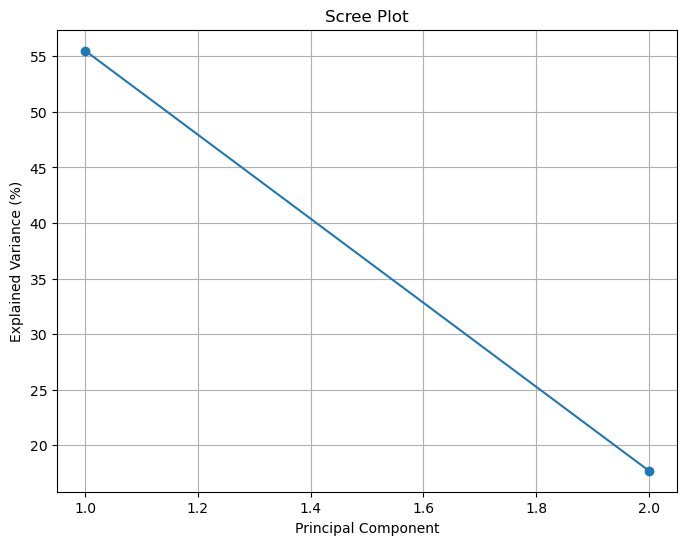

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

- The first point on the plot corresponds to PC1, which captures more than half (55.5%) of the total variance
- The second point represents PC2, contributing 17.71% of the variance.
- The cumulative variance (73.21%) suggests that these two components together capture a substantial amount of the data’s variance.
- The steep drop between PC1 and PC2 indicates that PC1 is dominant

**NOTE :** Since PC1 alone explains the majority of the variation, it suggests that many of the original variables are highly correlated.

## Step 2: Correlation Circle

**Objective:** To visualize how the original features correlate with the principal components.

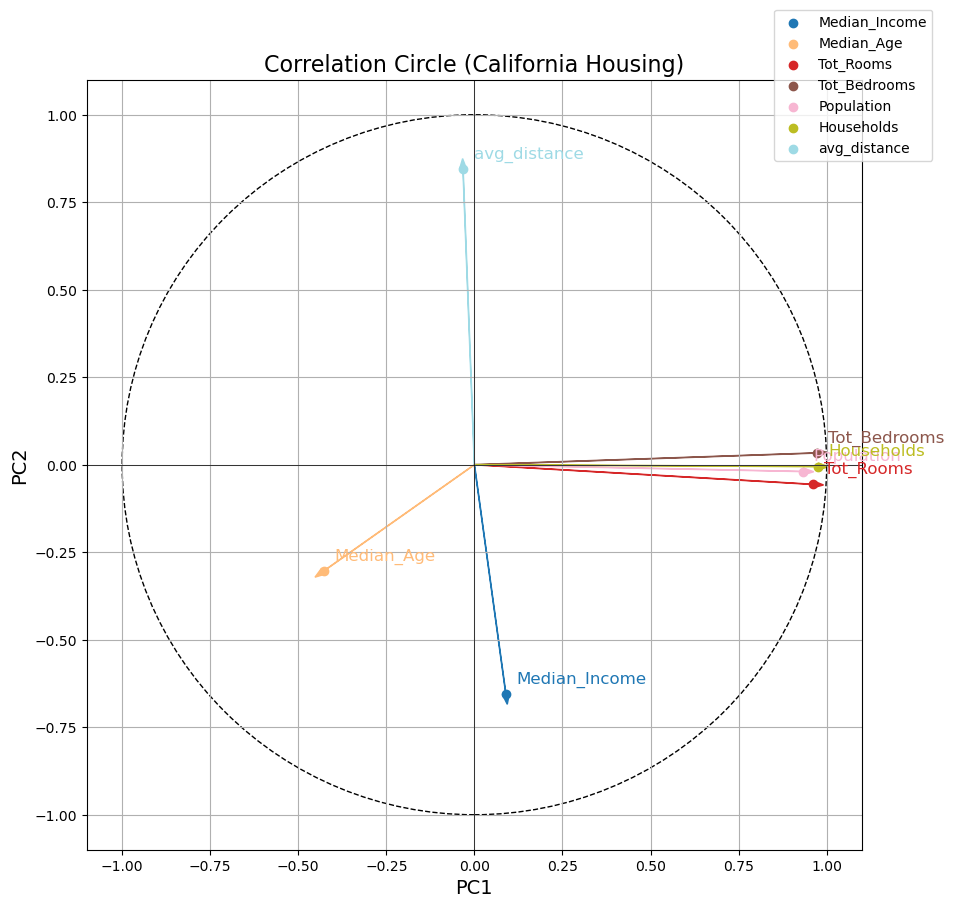

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Create a colormap with as many colors as there are features
colors = plt.cm.tab20(np.linspace(0, 1, len(X.columns)))

# Plot the loadings with unique colors
for (feature, (x, y)), color in zip(zip(X.columns, pca.column_correlations.values), colors):
    plt.scatter(x, y, color=color, label=feature)
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.03, fc=color, ec=color)
    plt.text(x + 0.03, y + 0.03, feature, fontsize=12, color=color)

# Add a unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
ax.add_artist(circle)

# Set limits and labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('Correlation Circle (California Housing)', fontsize=16)
plt.grid(True)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)

plt.show()

**general notes:**

*Axes Interpretation:*

- PC1 (x-axis) captures the most significant variation in the dataset.
- PC2 (y-axis) captures the second-largest independent variation.
  
*Arrow Length (Magnitude):*

- Longer arrows indicate features strongly correlated with the principal components.
- Shorter arrows mean weak correlation with these components.
  
*Arrow Direction (Correlation):*

- Same direction → Positively correlated features.
- Opposite directions → Negatively correlated features.
- Perpendicular arrows → Uncorrelated features.

**Key Insights from the Correlation Circle:**

*A. Variables Closely Grouped (Right Side of PC1)*

- Tot_Rooms, Tot_Bedrooms, Households, and Population are tightly clustered.
- They are positively correlated with PC1, meaning that PC1 represents overall housing size and population density.
- These features likely reflect the scale of housing units: more rooms and more people.

**Interpretation:** Higher PC1 values indicate areas with larger housing units, more bedrooms, and a denser population, whereas lower PC1 values indicate smaller, less dense housing

*B. Median_Income (Lower Quadrant)*

- Median_Income points downwards and is moderately aligned with PC2 in the negative direction.
- This indicates a negative correlation with PC2—as income increases, the value along PC2 decreases.
  
**Interpretation:** PC2 appears to capture a socioeconomic divide, where lower PC2 values correspond to wealthier areas, while higher PC2 values are associated with lower-income regions

*C. avg_distance (Upper Quadrant)*

- The variable avg_distance (likely representing the average distance to employment centers) shows a positive correlation with PC2.

- This implies that as the distance increases, PC2 also increases.

**Interpretation:** PC2 captures urban-suburban spread, where higher values represent homes located farther from major city centers, often in suburban or rural areas.

*D. Median_Age (Left Quadrant)*

- Median_Age points left and slightly downward, meaning:
    - It is negatively correlated with PC1.
    - Slight negative correlation with PC2 too.
  
**Interpretation:** Older neighborhoods tend to have smaller housing units, but their proximity to employment centers is not necessarily indicated by PC1 alone.

***Thematic Interpretation of Principal Components (PC1 & PC2)***

**PC1 (55.50% variance – Housing Density & Scale)**
    - Positive values: Larger houses, more bedrooms, higher population density.
    - Negative values: Smaller housing units and fewer people.
  
**PC2 (17.71% variance – Socioeconomic & Spatial Distribution)**
    - Positive values: Greater average distance to economic centers, older properties.
    - Negative values: Higher income, closer to employment centers.

***Real-World Interpretation of California Housing Trends***

**Urban vs. Suburban Divide:**

- Urban areas (high income, smaller distance) are represented by negative PC2.
- Suburban/rural regions (larger distance, older housing) correspond to positive PC2.
  
**Wealth & Housing Density:**

- Wealthier areas (negative PC2) tend to have smaller but closer properties to city hubs.
- Lower-income regions (positive PC2) have larger, more dispersed housing.
  
**Age of Neighborhoods:**

- Older neighborhoods (negative PC1) tend to have fewer rooms and be farther away.
Newer, larger housing clusters near economic activity (positive PC1).

### Step 3 : Score Plot

**Objective:** To visualize the data in the principal component space.

In [29]:
df2=df.copy()
# Categorize Median_House_Value into Low, Medium, High
df2['Price_Category'] = pd.cut(
    df2['Median_House_Value'],
    bins=[df2['Median_House_Value'].min(), df2['Median_House_Value'].quantile(0.33), df2['Median_House_Value'].quantile(0.66), df2['Median_House_Value'].max()],
    labels=['Low', 'Medium', 'High']
)

# Check the result
print(df2[['Median_House_Value', 'Price_Category']].head(20))

    Median_House_Value Price_Category
0             452600.0           High
1             358500.0           High
2             352100.0           High
3             341300.0           High
4             342200.0           High
5             269700.0           High
6             299200.0           High
7             241400.0           High
8             226700.0         Medium
9             261100.0           High
10            281500.0           High
11            241800.0           High
12            213500.0         Medium
13            191300.0         Medium
14            159200.0         Medium
15            140000.0            Low
16            152500.0         Medium
17            155500.0         Medium
18            158700.0         Medium
19            162900.0         Medium


***Categorize the Target Variable (Median_House_Value):***

we categorized first the continuous target variable Median_House_Value (house prices) into Low, Medium, and High price categories for several reasons:

- **Improved Interpretability:**

    - Continuous variables (like house prices) can be difficult to interpret directly on a scatter plot.
    - By grouping prices into categories, the relationship between the principal components and price ranges becomes easier to visualize.
  
- **Identifying Patterns Across Price Segments:**

    - This helps us analyze how different price categories distribute in the reduced PC space.
    - For example, we can observe whether high-priced houses cluster in specific regions of the PCA plot.
  
- **Understanding Feature-Price Relationships:**

    - we can interpret how the underlying features (like rooms, income, or age) influence price categories by observing where each group falls on PC1 and PC2

In [30]:
# Reattach the Price_Category column to principal_components
principal_components['Price_Category'] = df2['Price_Category']

In [31]:
principal_components.head(16)

component,0,1,Median_House_Value,Price_Category
0,-1.920297,-1.766998,452600.0,High
1,3.138794,-1.461453,358500.0,High
2,-1.793538,-1.715464,352100.0,High
3,-1.742162,-1.208565,341300.0,High
4,-1.598671,-0.657721,342200.0,High
5,-1.979870,-0.702040,269700.0,High
6,-0.603746,-0.628508,299200.0,High
7,-0.058924,-0.463121,241400.0,High
8,-0.106473,0.087616,226700.0,Medium
9,0.329076,-0.655712,261100.0,High


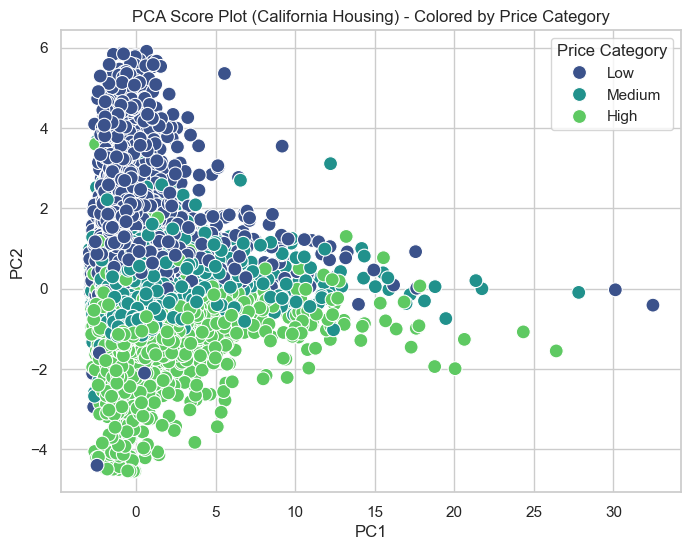

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the scatter plot with colored points
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=principal_components[0],
    y=principal_components[1],
    hue=principal_components['Price_Category'],  # Color by Price_Category
    palette='viridis',  # Use a color palette
    s=100
)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Score Plot (California Housing) - Colored by Price Category')

# Add a legend
plt.legend(title='Price Category')

# Show the plot
plt.show()

**Key Observations from the PCA Score Plot:**

*Price Distribution Along PC1 (x-axis):*

- Low-Price Houses (Dark Blue):
  - Mostly concentrated toward the left side (lower PC1 values).
  - This suggests that low-price houses are associated with smaller properties, lower population density, and possibly older neighborhoods.
  
- High-Price Houses (Light Green):
    - Spread further right on PC1.
    - This indicates that higher house prices are linked to larger homes, more rooms, and higher-income neighborhoods.
  
- Medium-priced houses (greenish-blue points):
  - Generally positioned between Low and High price groups along PC1.
  - This suggests that mid-range priced houses have moderate characteristics—neither very small nor very large.
  
*Price Variation Along PC2 (y-axis):*

- Low-Price Houses dominate the upper region of PC2.
    - This suggests higher values of PC2 correlate with areas that are farther from urban cores or have older housing.This suggests that low-price homes are often located in older or less central locations.
- High-Price Houses tend to occupy the lower region of PC2.
    - Indicates that lower PC2 corresponds to wealthier areas with newer, modern housing and better access to city centers.

  
*Clustering and Separation:*
  - There is a clear separation between the Low, Medium, and High price groups.
  - Low-price houses are densely clustered, suggesting homogeneity (similar house features).
  - High-price houses are more dispersed, implying greater diversity in features like size, location, or age.
  - Medium-priced houses exhibit a moderate spread—less clustered than the low-price group but not as widely dispersed as the high-price group. This suggests that medium-priced houses share balanced characteristics without extreme variations.
  
*Outliers:*

  - There are a few outliers on the far-right side of PC1.
  - These might represent extremely large, high-priced properties or luxury homes.

## Step 4: Biplot

**Objective:** To visualize the scores of individuals/data (rows) and loadings of variable/features (columns) in the new principal component space. 
- it provides a combined visualization of the PCA results, representing both the distribution of samples (data points) and the contribution of each feature (variables) to the first two principal components (PC1 and PC2). 

In [33]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your dataset

In [34]:
# Limit the number of points for visualization
n_samples = 1000
sample_indices = np.random.choice(len(principal_components), n_samples, replace=False)
X_sampled = principal_components.iloc[sample_indices]

- This code snippet is used to limit the number of data points for visualization purposes, specifically for plotting a Biplot.
- By reducing the number of points to 1000, the visualization becomes less cluttered and more readable, making it easier to interpret the Biplot.

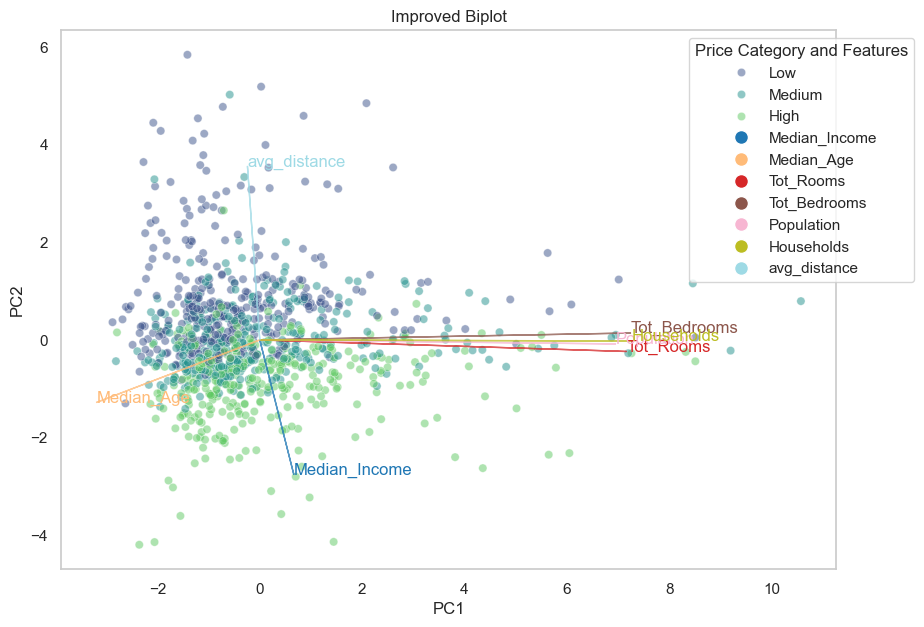

In [40]:
# Compute loadings
loadings = pca.column_correlations

# Scale the loadings for better visualization
scaling_factor = np.sqrt(pca.percentage_of_variance_)
loadings_scaled = loadings * scaling_factor

# Create a colormap with as many colors as there are features
colors = plt.cm.tab20(np.linspace(0, 1, len(X.columns)))

# Create biplot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=X_sampled.iloc[:, 0], 
    y=X_sampled.iloc[:, 1], 
    hue=X_sampled['Price_Category'],  # Color by Price_Category
    palette='viridis',  # Use a color palette
    alpha=0.5
)

# Plot variable loadings as arrows with unique colors
for i, (feature, color) in enumerate(zip(X.columns, colors)):
    plt.arrow(0, 0, loadings_scaled.iloc[i, 0], loadings_scaled.iloc[i, 1], color=color, alpha=0.75)
    plt.text(loadings_scaled.iloc[i, 0], loadings_scaled.iloc[i, 1], feature, color=color)

# Add legend for the features
handles, labels = scatter.get_legend_handles_labels()
for i, feature in enumerate(X.columns):
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10))
    labels.append(feature)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Improved Biplot')
plt.legend(handles=handles, labels=labels, title='Price Category and Features',bbox_to_anchor=(0.8, 1), loc='upper left')
plt.grid()
plt.show()

***Data Points (Scatterplot Interpretation):***

**Color Coding (Price Category):**

- The scatter points are colored based on the Price Category (Low, Medium, High), allowing us to observe how these categories are distributed across the principal components.
- Low Price Category (Dark Blue): Concentrated near the origin (0,0), suggesting lower variability and correlation with principal components.
- Medium Price Category (Greenish): Spread more widely, indicating greater variation along PC1 and PC2.
- High Price Category (Light Green/Yellow): Positioned further along PC1 in the positive direction, implying a strong association with the features aligned along this axis (like Median Income).

**Clustering Observation:**

- There is a clear separation between price categories along PC1, suggesting that this component captures the primary differences in housing prices.
- PC2 contributes less to the separation of price categories but captures some additional variation related to geographic or structural factors.

***Arrows (Feature Loadings Interpretation):***

The arrows indicate how strongly and in which direction each original feature contributes to the two principal components.

- **Median_Income (Dark Blue Arrow):**

    - Strongly aligned with PC2 in the negative direction.It is a good factor distinguishing higher-priced houses.
    - Areas with higher median incomes are associated with lower values along PC2, linking to more expensive housing.
  
- **Tot_Rooms & Tot_Bedrooms (Red and brown Arrows):**

    - These features are aligned strongly with PC1 in the positive, although to a way better extent than Median_Income they indicates that they are key factprs for higher-priced hourses.
    - Houses with more rooms and bedrooms are associated with higher price categories.

- **Households and Population (Brown and Pink Arrows):**

    - These features are strongly aligned with PC1, suggesting they contribute more to variance just like the bedrooms and rooms variables in the primary dimensions compared to other variables.
    - This indicates that household and population size have a good influence on price categorization and higher price houses are located in places where there is high population.
  
- **Median_Age (Orange Arrow):**

    - Points in a slightly negative direction along PC1, suggesting older properties are linked to lower-priced categories.
    - This implies that areas with older properties may correlate with lower-income or less expensive homes.
  
- **avg_distance (Light Blue Arrow):**

    - Aligned toward PC2 in the positive direction, meaning that average distance from employment centers or urban hubs captures some variation not explained by the first principal component.
    - Locations further away from city centers have a low home price.
  

***Principal Components (PC1 and PC2 Meaning):***

- **PC1 (Horizontal Axis):**

  - Dominated by socioeconomic factors like Median Income, Total Rooms, and Total Bedrooms.

- **PC2 (Vertical Axis):**

  - Captures geographic or structural factors like average distance from city centers.
  - Less variation is explained by this component, but it differentiates houses based on their location-related features.
  -  Represents a gradient from low-income, smaller homes (positive PC2) to high-income, larger homes (negative PC2).

# key insights

This Principal Component Analysis (PCA) study provides insights into how various housing features influence house prices. The results are based on the first two principal components (PC1 and PC2), which together capture 73.21% of the total variance in the dataset.

*PC1 (55.50% variance) - Housing Density & Property Scale*

- PC1 is the dominant component, explaining over half the dataset's variance.

- It is strongly correlated with house size, number of rooms, and land area.

- Low PC1 values (left side of the PCA plot) → Smaller, more compact homes.

- High PC1 values (right side) → Larger homes, more spacious properties, likely in wealthier areas.

*PC2 (17.71% variance) - Socioeconomic & Spatial Distribution*

- PC2 captures factors like neighborhood age, population density, and socioeconomic characteristics.

- Higher PC2 values (upper side) → Older suburban or rural homes, likely more affordable.

- Lower PC2 values (lower side) → Newer, modern properties, potentially in high-income areas.

*Price Distribution Trends*

- Low-Price Homes (Dark Blue)

    - Clustered toward low PC1 (smaller homes, higher density) and high PC2 (older areas).

    - Indicates affordability is linked to property size and suburban/rural locations.

- Mid-Price Homes (Greenish-Blue)

    - Spread in mid-range PC1 and PC2, showing moderate diversity in features.

    - Represent a transition between affordable and luxury housing.

- High-Price Homes (Light Green)

    - Found at high PC1 (larger properties) and low PC2 (newer, affluent areas).

    - Suggests premium pricing is tied to property size and modern, high-income neighborhoods.

    - More dispersed, indicating diverse luxury market features.

*Outliers & Special Cases*
- A few high PC1 values (far-right points) indicate exceptionally large luxury homes.

- The dispersion of high-price homes suggests a mix of urban high-end apartments and suburban mansions.

# conclusion 

This study confirms that **house prices** are influenced by both physical and socioeconomic factors. **PCA** reveals that property size and neighborhood characteristics are key drivers of price variation. Higher-priced homes are more diverse, while lower-priced homes are more uniform.

Understanding these patterns can help buyers, investors, and policymakers make informed decisions, from identifying affordable housing trends to targeting high-value real estate investments. PCA proves to be an effective tool in simplifying complex housing data, offering a clear perspective on market segmentation.